In [1]:
### data and matrix handling
import pandas as pd
import numpy as np

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## scientific
import scipy

## utilities
import os

In [2]:
## loading the data
data_path = "x__data/"
math_path = os.path.join(data_path, "student_math_clean.csv")
portuguese_path = os.path.join(data_path, "student_portuguese_clean.csv")

math_df = pd.read_csv(math_path)
portuguese_df = pd.read_csv(portuguese_path)

## Looking at Data

### `Math` data

In [3]:
math_df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(f"There are {math_df.shape[0]} samples in the Math dataframe")

There are 395 samples in the Math dataframe


### `Portuguese` data

In [5]:
portuguese_df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
print(f"There are {portuguese_df.shape[0]} samples in the Portuguese dataframe")

There are 649 samples in the Portuguese dataframe


### Checking for differences in `math` and `portuguese` features

In [7]:
math_features = set(math_df.columns)
portuguese_features = set(portuguese_df.columns)

print(f"There are {len(math_features-portuguese_features)} number of feature differences")

There are 0 number of feature differences


# Exploratory Data Analysis

### Adding feature to differenciate `math intensive` subjects from `non-math-intensive`

In [8]:
new_feature_name = "math_intensive"
portuguese_df["math_intensive"] = "no"
math_df["math_intensive"] = "yes"

## Putting datasets together

In [9]:
student_df = pd.concat([portuguese_df, math_df], axis=0)

In [10]:
student_df.shape

(1044, 35)

### Removing Unnecessary Features
The school feature is unnecessary since it is not a feature under consideration

In [11]:
student_df.drop("school", axis=1, inplace=True)

## Checking for Missing

In [12]:
print(f"There are {student_df.isna().sum().sum()} missing values")

There are 0 missing values


## Dropping duplicate rows

In [13]:
student_df.drop_duplicates(inplace=True)

In [14]:
print(f"Number of rows after drop: {student_df.shape[0]}")

Number of rows after drop: 1044


## Separating into `categorical` and `numerical` features

In [15]:
cat_df = student_df.select_dtypes("object")
num_df = student_df.select_dtypes("number")

In [16]:
print(f"There are {cat_df.shape[1]} categorical features and {num_df.shape[1]} numerical features")

There are 21 categorical features and 13 numerical features


## Numerical Features

In [17]:
num_df.columns

Index(['student_id', 'age', 'class_failures', 'family_relationship',
       'free_time', 'social', 'weekday_alcohol', 'weekend_alcohol', 'health',
       'absences', 'grade_1', 'grade_2', 'final_grade'],
      dtype='object')

### Dropping unnecessary columns

In [18]:
num_df = num_df.drop(["student_id"], axis=1)

In [19]:
num_df.columns

Index(['age', 'class_failures', 'family_relationship', 'free_time', 'social',
       'weekday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_1',
       'grade_2', 'final_grade'],
      dtype='object')

### Numerical Data summary

In [20]:
num_df.describe()

,age,class_failures,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Feature Distributions

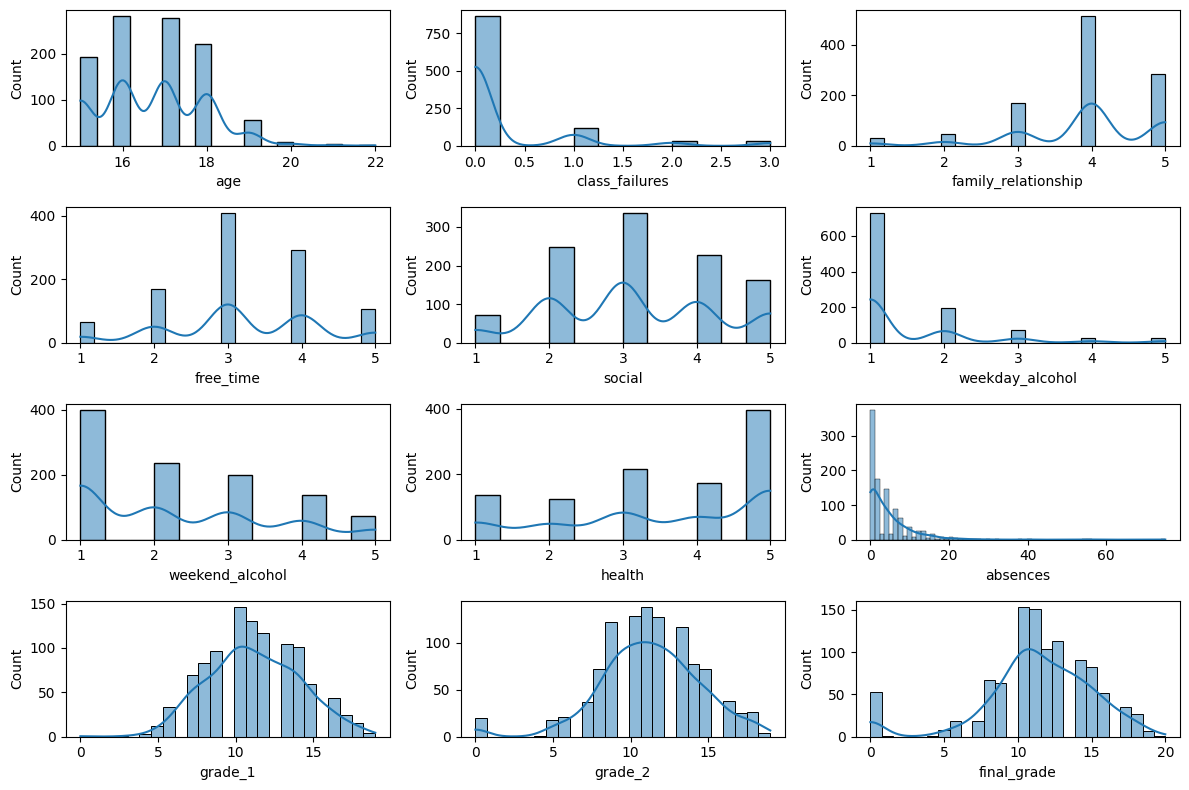

In [21]:
# student_df["age"].hist()
# sns.displot(student_df,  kind="kde")
fig, axes = plt.subplots(4,3, figsize=(12, 8))

for ax,col in zip(axes.flatten(), num_df.columns):
    sns.histplot(num_df[col], ax=ax, kde=True)

plt.tight_layout()
plt.show()

### Checking Correlations

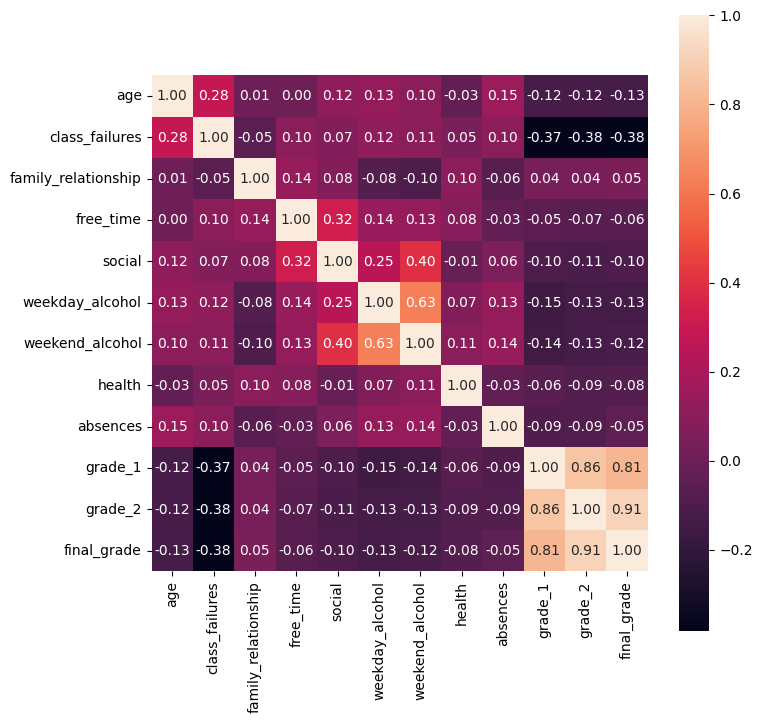

In [22]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(num_df.corr(), square=True, annot=True, fmt=".2f")
plt.show()

### Pairplots
This is necessary to see the relationship between variables; whether `linear`, `quadratic` etc

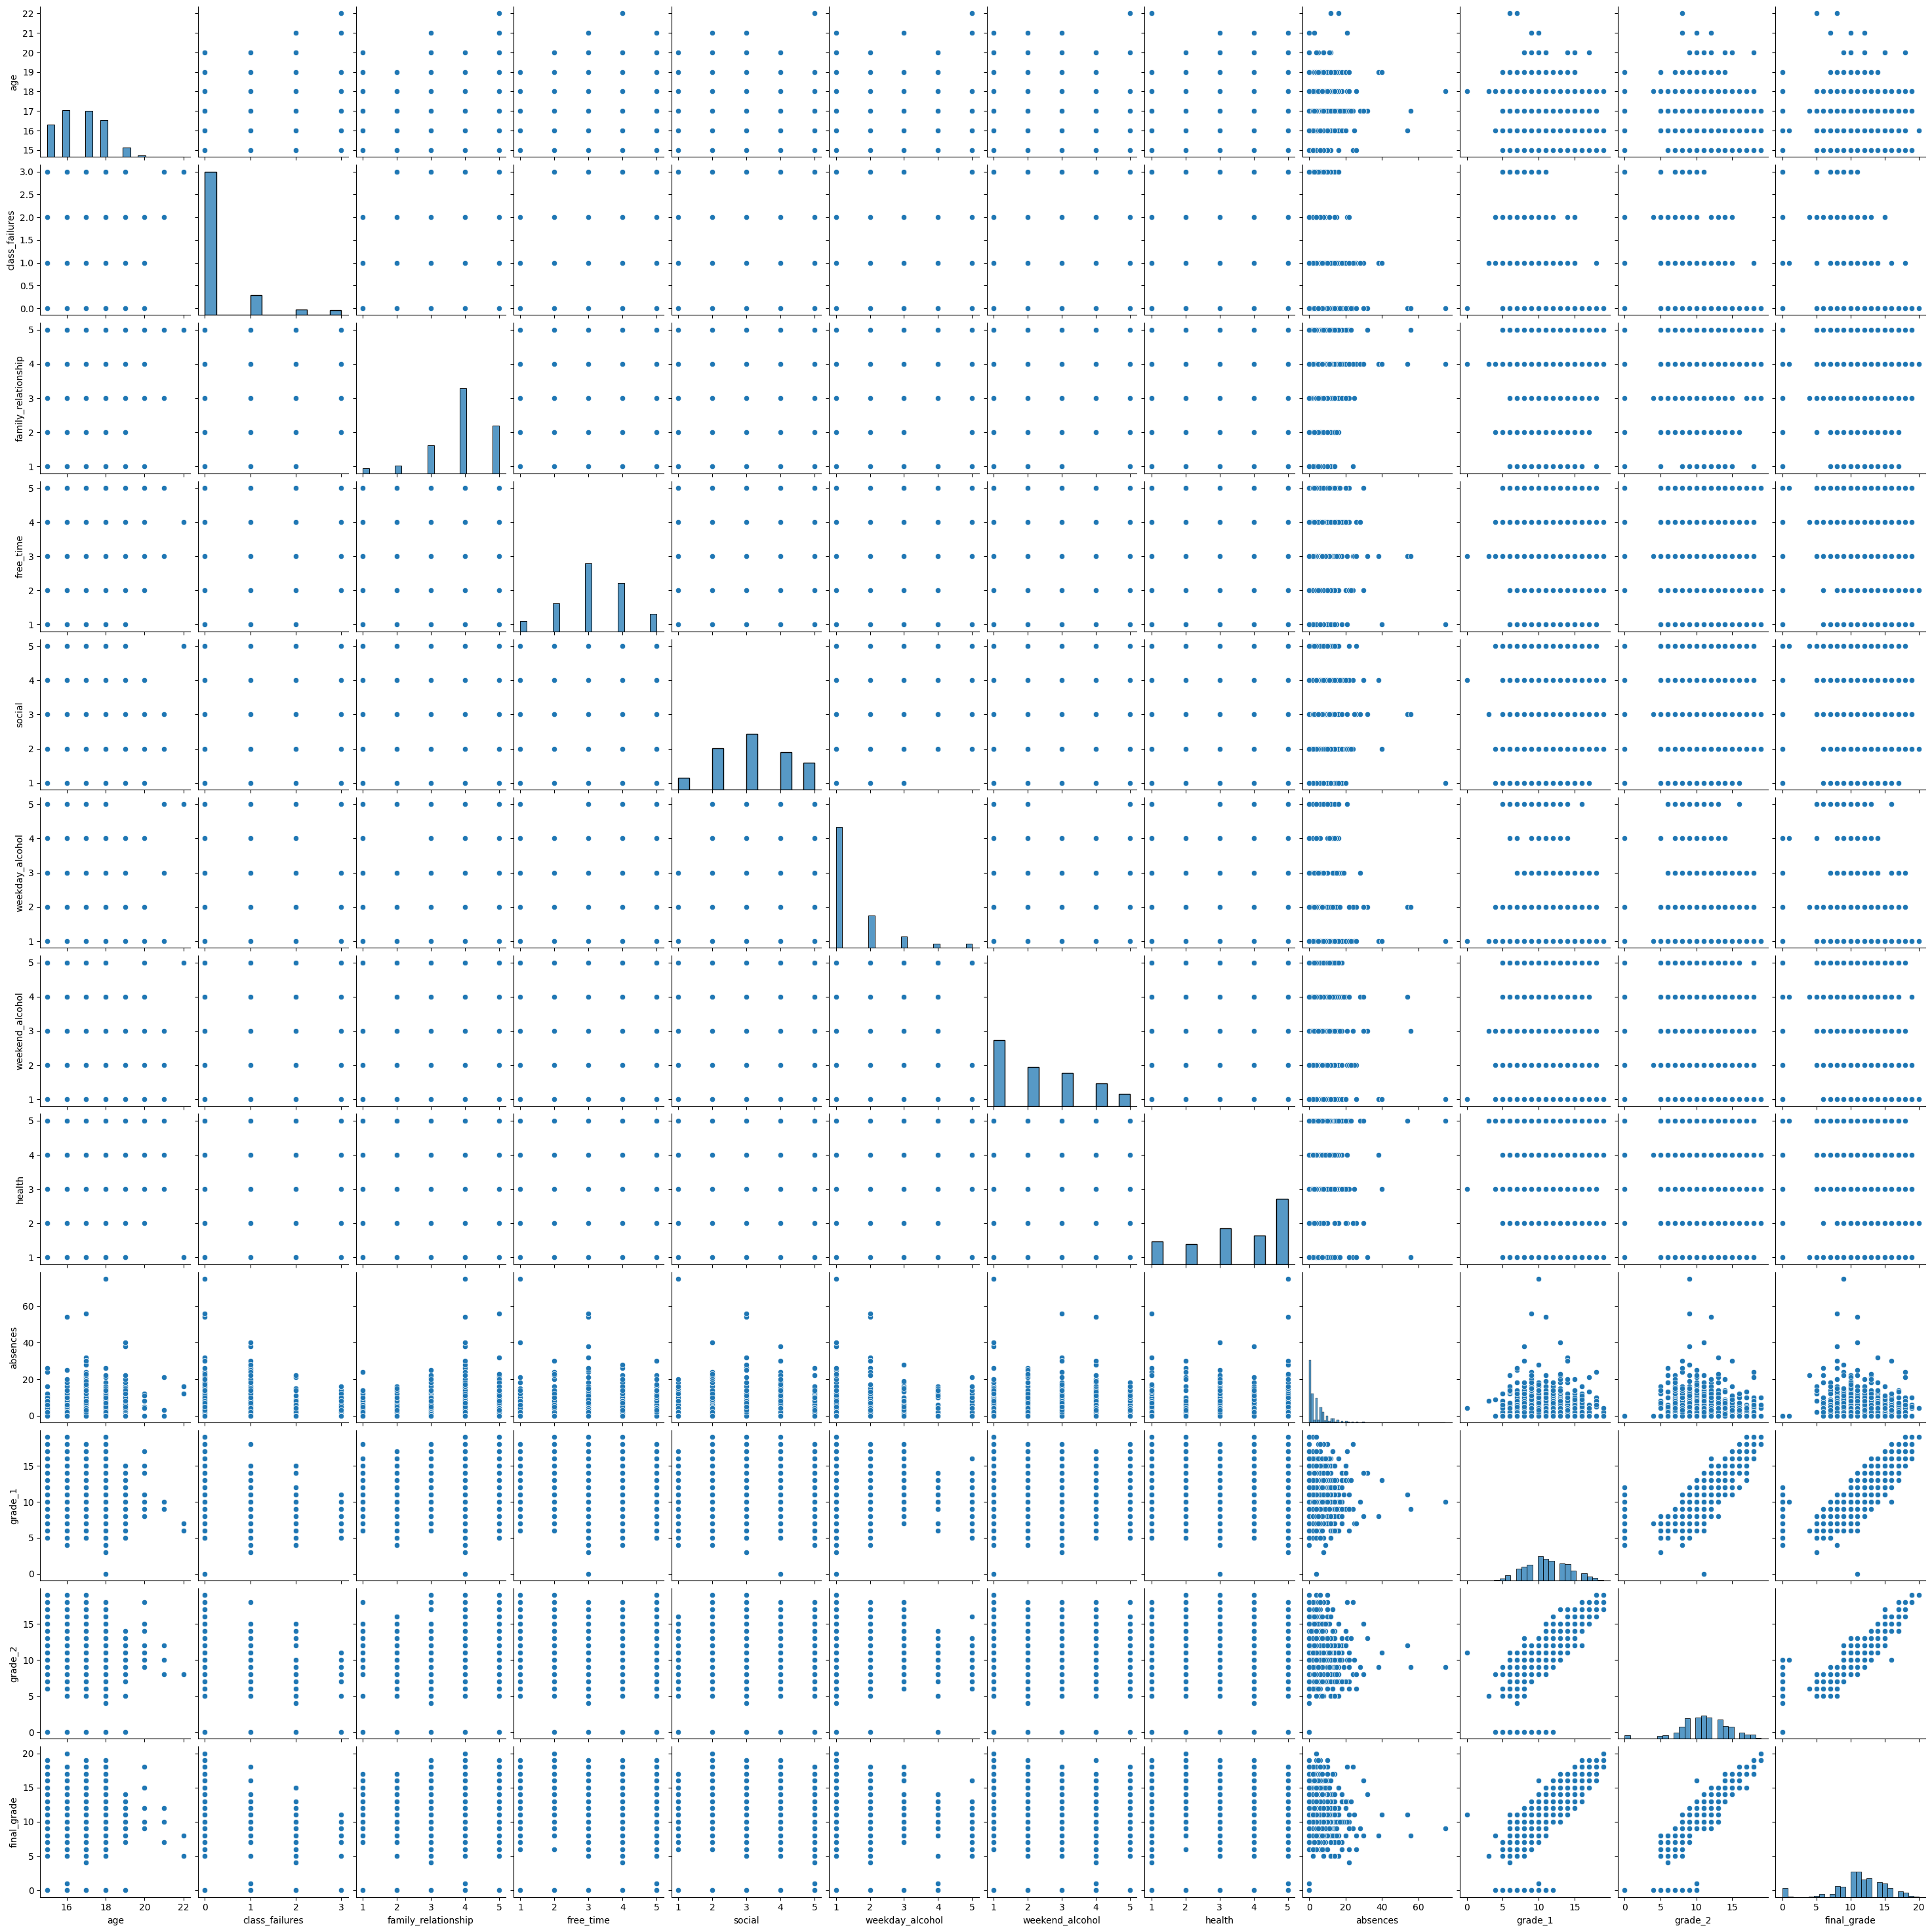

In [23]:
sns.pairplot(num_df)
plt.show()

## Categorical Features

### Brief description

In [24]:
cat_df.describe(include="object").T

,count,unique,top,freq
sex,1044,2,F,591
address_type,1044,2,Urban,759
family_size,1044,2,Greater than 3,738
parent_status,1044,2,Living together,923
mother_education,1044,5,higher education,306
father_education,1044,5,5th to 9th grade,324
mother_job,1044,5,other,399
father_job,1044,5,other,584
school_choice_reason,1044,4,course,430
guardian,1044,3,mother,728


### Categories and mean scores

#### Getting the standard deviation of ***final_grade***

In [25]:
student_df["final_grade"].describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: final_grade, dtype: float64

In [26]:
def mean_on_group(feature):
    return student_df.groupby(feature)["final_grade"].mean()

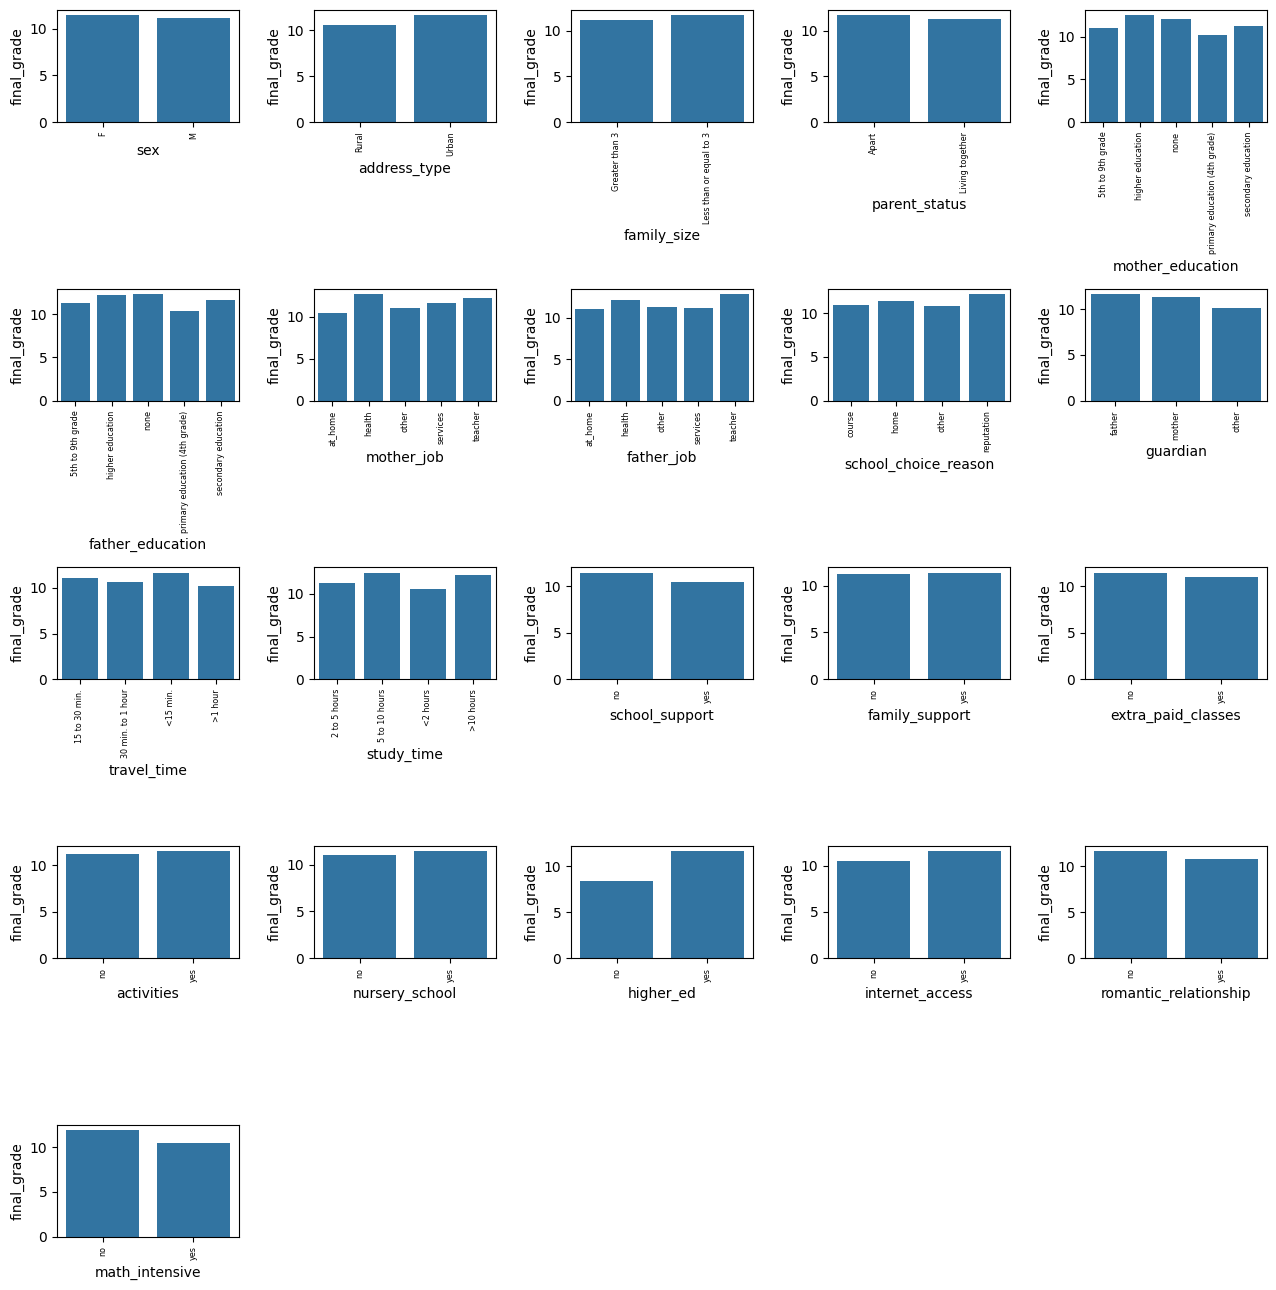

In [27]:
n = len(cat_df.columns)
fig, axes = plt.subplots(5,5, figsize=(13,13))
axes = axes.flatten()
for col, ax in zip(cat_df.columns, axes):
    sns.barplot(mean_on_group(col), ax=ax)


for i in range(len(axes)):
    ax = axes[i]
    if i >= len(cat_df.columns):
        ax.set_axis_off()
    else:
        ax.set_xticks(ax.get_xticks(), labels=ax.get_xticklabels(), rotation=90, fontsize="xx-small")

plt.tight_layout()
plt.show()

- <span style="color: slateblue">Students who want plan on taking <strong>higher_ed</strong> perform significantly better than those who don't plan to (difference in mean final grade is greater than 1 standard deviation)</span>
- <span style="color: slateblue">This could be due to the fact that majority wish to pursue higher education, hence inbalance<span/>

#### Bivariate analysis with `higher_ed` as hue

<Axes: xlabel='grade_1', ylabel='final_grade'>

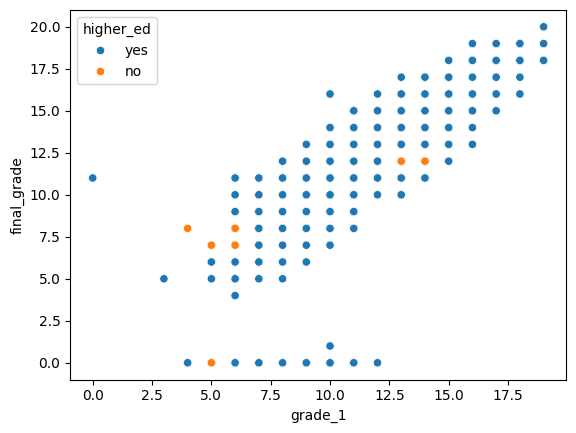

In [28]:
sns.scatterplot(data=student_df, x="grade_1", y="final_grade", hue="higher_ed")

<span style="color: slateblue">Reason for lower mean of student who do not wish to pursue higher ed might be due to single outlier</span>

## Preparing for prediction

In [108]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Separating into predictors and target

In [109]:
drops = ["final_grade", "grade_1", "grade_2"]
X = student_df.drop(drops, axis=1)
y = student_df["final_grade"]

### `Preprocessing Pipeline`

In [110]:
## getting numerical and categorical features
numerical_features = num_df.drop(drops, axis=1).columns
categorical_features = cat_df.columns

## transformer for numeric features
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler())])

## transformer for categorical features
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder())])


## preprocessor)
preprocessor = ColumnTransformer(
    transformers = [
        ("numerical", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features)
    ]
)

### Preprocessing

In [111]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'class_failures', 'family_relationship', 'free_time', 'social',
       'weekday_alcohol', 'weekend_alcohol', 'health', 'absences'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index(['sex', 'address_type', 'family_size', 'parent_status',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'school_choice_reason', 'guardian', 'travel_time', 'study_time',
       'school_support', 'family_support', 'extra_paid_classes', 'activities',
       'nursery_school', 'higher_ed', 'internet_access',
       'romantic_relationship', 'math_intensive'],
      dtype='object'))])

In [112]:
X = preprocessor.transform(X)

## Training

In [113]:
## models 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

## hyperparameter selection
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

## metrics
from sklearn.metrics import r2_score

### Splitting data into train and test

In [114]:
ts = 0.2
rs = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

### Grid Search

In [115]:
## folds
kf = KFold(n_splits=7, shuffle=True, random_state=42)

In [119]:
## function for grid_search
def grid_search(estimator, params, X, y, verbose=0):
    global kf
    grid = GridSearchCV(estimator, params, cv=kf, scoring="r2", verbose=verbose)
    grid.fit(X, y)

    print(f"Best score: {grid.best_score_}")
    print(f"Best parameters: {grid.best_params_}")

    return grid.best_estimator_

#### Decision Tree Regressor

In [117]:
params = {
    "max_depth": [2,4,6,8]
}

grid_search(DecisionTreeRegressor(), params, X_train, y_train)

Best score: 0.22361539352321394
Best parameters: {'max_depth': 2}


DecisionTreeRegressor(max_depth=2)

#### SVR

In [121]:
params = {
    "C": [0.5, 1, 1.3]
}

grid_search(SVR(), params, X_train, y_train)

Best score: 0.2519958275270124
Best parameters: {'C': 1.3}


SVR(C=1.3)

#### Random Forest Regressor

In [123]:
params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [4,6,8, 10]
}

grid_search(RandomForestRegressor(), params, X_train, y_train, verbose=10)

Fitting 7 folds for each of 12 candidates, totalling 84 fits
[CV 1/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 1/7; 1/12] END max_depth=4, n_estimators=100;, score=0.259 total time=   0.6s
[CV 2/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 2/7; 1/12] END max_depth=4, n_estimators=100;, score=0.327 total time=   0.6s
[CV 3/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 3/7; 1/12] END max_depth=4, n_estimators=100;, score=0.227 total time=   0.5s
[CV 4/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 4/7; 1/12] END max_depth=4, n_estimators=100;, score=0.224 total time=   0.6s
[CV 5/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 5/7; 1/12] END max_depth=4, n_estimators=100;, score=0.388 total time=   0.6s
[CV 6/7; 1/12] START max_depth=4, n_estimators=100..............................
[CV 6/7; 1/12] END max_depth=4, n_estimator

RandomForestRegressor(max_depth=10)

#### Gradient Boosting Regressor

In [124]:
params = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [2,4,6,8],
    "learning_rate": [0.1, 0.3, 1]
}

grid_search(GradientBoostingRegressor(), params, X_train, y_train, verbose=10)

Fitting 7 folds for each of 36 candidates, totalling 252 fits
[CV 1/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 1/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.325 total time=   0.9s
[CV 2/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 2/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.422 total time=   0.8s
[CV 3/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 3/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.252 total time=   1.0s
[CV 4/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 4/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.263 total time=   1.0s
[CV 5/7; 1/36] START learning_rate=0.1, max_depth=2, n_estimators=300...........
[CV 5/7; 1/36] END learning_rate=0.1, max_depth=2, n_estimators=300;, score=0.406 total time=   0.9s
[CV 6/7; 1/36] START learnin

GradientBoostingRegressor(max_depth=2, n_estimators=300)

### Training Models

#### Linear Regression

In [89]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [90]:
print(r2_score(lr.predict(X_test), y_test))

-1.5003242132110124
